In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_theme(style="darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8,6))

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<Figure size 576x432 with 0 Axes>

In [3]:
#Importando a base de dados

import os 
datadir = "./120-years-of-olympic-history"

data_files = os.listdir(datadir)
print("List of downloaded files - ", data_files)

List of downloaded files -  ['athlete_events.csv', 'athlete_events_data_dictionary.csv', 'country_definitions.csv', 'country_definitions_data_dictionary.csv']


In [4]:
#Criando as file paths para os arquivos presentes:

file_country_definition_data_dictionary = datadir + "/" + data_files[3]
file_country_definition = datadir + "/" + data_files[2]
file_athelete_events_data_dictionary = datadir + "/" + data_files[1]
file_athelete_events = datadir + "/" + data_files[0]

print(file_country_definition_data_dictionary)

./120-years-of-olympic-history/country_definitions_data_dictionary.csv


In [5]:
country_definition_data_dictionary_df = pd.read_csv(file_country_definition_data_dictionary)
print('Country Definition Data Dictionary:')
print(country_definition_data_dictionary_df)

Country Definition Data Dictionary:
    Field                                        Description
0     NOC           National Olympic Committee 3 letter code
1  region           Country name used for geospatial mapping
2   notes  Real country name if "region" isn't an exact m...


In [27]:
country_definition_df = pd.read_csv(file_country_definition)
print('Country Definition:')
print(country_definition_df)

Country Definition Data Dictionary:
     NOC       region                 notes
0    AFG  Afghanistan                   NaN
1    AHO      Curacao  Netherlands Antilles
2    ALB      Albania                   NaN
3    ALG      Algeria                   NaN
4    AND      Andorra                   NaN
..   ...          ...                   ...
225  YEM        Yemen                   NaN
226  YMD        Yemen           South Yemen
227  YUG       Serbia            Yugoslavia
228  ZAM       Zambia                   NaN
229  ZIM     Zimbabwe                   NaN

[230 rows x 3 columns]


In [6]:
athelete_events_data_dictionary_df = pd.read_csv(file_athelete_events_data_dictionary)
print('Athelete events data dictionary:')
print(athelete_events_data_dictionary_df)

Athelete events data dictionary:
     Field                               Description
0       ID            Unique number for each athlete
1     Name                            Athlete's name
2      Sex                    Male (M) or Female (F)
3      Age                                   Integer
4   Height                            In centimeters
5   Weight                              In kilograms
6     Team                                 Team name
7      NOC  National Olympic Committee 3-letter code
8    Games                           Year and season
9     Year                                   Integer
10  Season                          Summer or Winter
11    City                                 Host city
12   Sport                                     Sport
13   Event                                     Event
14   Medal               Gold, Silver, Bronze, or NA


In [7]:
athelete_events_df = pd.read_csv(file_athelete_events)
print('Athelete events:')
print(athelete_events_df)

Athelete events:
            ID                      Name Sex   Age  Height  Weight            Team  NOC        Games  Year  Season            City          Sport                                     Event Medal
0            1                 A Dijiang   M  24.0   180.0    80.0           China  CHN  1992 Summer  1992  Summer       Barcelona     Basketball               Basketball Men's Basketball   NaN
1            2                  A Lamusi   M  23.0   170.0    60.0           China  CHN  2012 Summer  2012  Summer          London           Judo              Judo Men's Extra-Lightweight   NaN
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark  DEN  1920 Summer  1920  Summer       Antwerpen       Football                   Football Men's Football   NaN
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris     Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold
4            

In [13]:
#colunas da Dataframe

print(athelete_events_df.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'], dtype='object')


In [19]:
#describe do DataFrame
print(athelete_events_df.describe())

                  ID            Age         Height         Weight           Year
count  271116.000000  261642.000000  210945.000000  208241.000000  271116.000000
mean    68248.954396      25.556898     175.338970      70.702393    1978.378480
std     39022.286345       6.393561      10.518462      14.348020      29.877632
min         1.000000      10.000000     127.000000      25.000000    1896.000000
25%     34643.000000      21.000000     168.000000      60.000000    1960.000000
50%     68205.000000      24.000000     175.000000      70.000000    1988.000000
75%    102097.250000      28.000000     183.000000      79.000000    2002.000000
max    135571.000000      97.000000     226.000000     214.000000    2016.000000


In [24]:
#Qual o número de participantes dividido por gênero?

males_count = athelete_events_df[athelete_events_df['Sex'] == 'M']['Sex'].count()


females_count = athelete_events_df[athelete_events_df['Sex'] == 'F']['Sex'].count()

print('Números de participandes por gênero:')
print('Number of Males - ', males_count)
print('Number of females- ', females_count)

print('Porcentagem de participantes por gênero:')
print('Porcentagem de homens:', males_count / (males_count + females_count))
print('Porcentagem de homens:', females_count / (males_count + females_count))

Números de participandes por gênero:
Number of Males -  196594
Number of females-  74522
Porcentagem de participantes por gênero:
Porcentagem de homens: 0.7251287271868868
Porcentagem de homens: 0.2748712728131132


<AxesSubplot:xlabel='Sex', ylabel='count'>

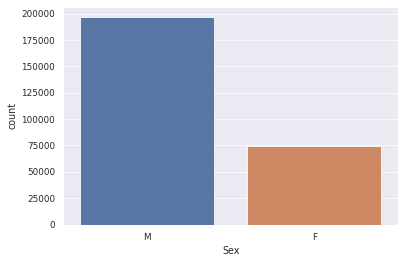

In [25]:
#Plotando os dados no gŕafico:

sns.countplot(x = 'Sex', data = athelete_events_df)

In [35]:
#Qual Atleta apareceu por mais vezes nas olimpiadas?

athelete_events_df['Name'].value_counts()




Robert Tait McKenzie            58
Heikki Ilmari Savolainen        39
Joseph "Josy" Stoffel           38
Ioannis Theofilakis             36
Takashi Ono                     33
                                ..
Tatyana Vasilyevna Kalmykova     1
Mariya Lvovna Kalmykova          1
Christine Kalmer                 1
Joannis "Jannis" Kalmazidis      1
Pierre-Georges LeClercq          1
Name: Name, Length: 134732, dtype: int64

In [51]:
#Pegando o valor Máximo de participações:
print('Este é o valor máximo de participações:')

max_appearances = athelete_events_df['Name'].value_counts()

print(max_appearances)

Este é o valor máximo de participações:
Robert Tait McKenzie            58
Heikki Ilmari Savolainen        39
Joseph "Josy" Stoffel           38
Ioannis Theofilakis             36
Takashi Ono                     33
                                ..
Tatyana Vasilyevna Kalmykova     1
Mariya Lvovna Kalmykova          1
Christine Kalmer                 1
Joannis "Jannis" Kalmazidis      1
Pierre-Georges LeClercq          1
Name: Name, Length: 134732, dtype: int64


In [52]:
#Pegando os mais citados:

series_atletes = max_appearances.index

print(series_atletes)

Index(['Robert Tait McKenzie', 'Heikki Ilmari Savolainen', 'Joseph "Josy" Stoffel', 'Ioannis Theofilakis', 'Takashi Ono', 'Andreas Wecker', 'Alexandros Theofilakis', 'Alfrd (Arnold-) Hajs (Guttmann-)', 'Jean Lucien Nicolas Jacoby', 'Michel Mathiot',
       ...
       'Margit Kalocsai (Krammer)', 'Sndor Kal', 'Juris Kalni', 'Alfrds Kalni', 'Pavla Kaln', 'Tatyana Vasilyevna Kalmykova', 'Mariya Lvovna Kalmykova', 'Christine Kalmer', 'Joannis "Jannis" Kalmazidis', 'Pierre-Georges LeClercq'], dtype='object', length=134732)


In [53]:
#Detalhes dos dados do mais citado:

atlete_name = series_atletes[0]

athelete_events_df[athelete_events_df['Name'] == atlete_name]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
154798,77710,Robert Tait McKenzie,M,44.0,NaN,NaN,Canada,CAN,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,NaN
154799,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154800,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154801,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154802,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154803,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154804,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154805,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154806,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",Bronze
154807,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN


In [60]:
#Lista dos paises participantes:

list_of_countries = athelete_events_df['NOC'].unique()

print(list_of_countries)

['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' 'MDA' 'YUG' 'BAH' 'GUA' 'SRB' 'I

In [68]:
#Função para contar as medalhas:

medal_count_list = []

for country in list_of_countries:
    gold = silver = bronze = 0
    medal_count = athelete_events_df[athelete_events_df['NOC'] == country]
    
    
    try:
        gold = medal_count['Medal'].value_counts()['Gold']
    except:
        gold = 0

    try:
        silver = medal_count['Medal'].value_counts()['Silver']
    except:
        silver = 0

    try:
        bronze = medal_count['Medal'].value_counts()['Bronze']
    except:
        bronze = 0
        
    medal_dict = {}
    
    medal_dict = {
      "Country": country,
      "Gold": gold,
      "Silver": silver,
      "Bronze": bronze, 
      "Total" : gold + silver + bronze
    }
    
    medal_count_list.append(medal_dict)

In [69]:
medal_count_df = pd.DataFrame(medal_count_list)

print(medal_count_df)

    Country  Gold  Silver  Bronze  Total
0       CHN   350     347     292    989
1       DEN   179     241     177    597
2       NED   287     340     413   1040
3       USA  2638    1641    1358   5637
4       FIN   198     270     432    900
..      ...   ...     ...     ...    ...
225     TUV     0       0       0      0
226     NFL     0       0       0      0
227     KOS     1       0       0      1
228     SSD     0       0       0      0
229     LES     0       0       0      0

[230 rows x 5 columns]


In [70]:
#Qual o país que mais ganhou medalhas de ouro?

max_gold_index = medal_count_df["Gold"].idxmax()
print("Country with Max Gold - ", medal_count_df.loc[max_gold_index]["Country"])
print("Number of Gold medals won - ", medal_count_df.loc[max_gold_index]["Gold"])

Country with Max Gold -  USA
Number of Gold medals won -  2638


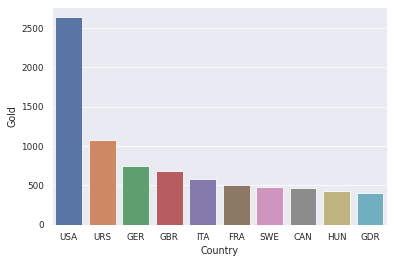

In [71]:
medal_count_df.sort_values('Gold', axis = 0, ascending = False, inplace = True)

sns.barplot(x = 'Country', y = 'Gold', data = medal_count_df.head(10));

In [73]:
#Qual o país que mais ganhou medalhas de prata?
max_gold_index = medal_count_df["Silver"].idxmax()
print("Country with Max Silver - ", medal_count_df.loc[max_gold_index]["Country"])
print("Number of Silver medals won - ", medal_count_df.loc[max_gold_index]["Silver"])

Country with Max Silver -  USA
Number of Silver medals won -  1641


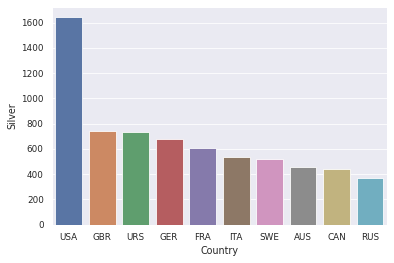

In [74]:
medal_count_df.sort_values('Silver', axis = 0, ascending = False, inplace = True)

sns.barplot(x = 'Country', y = 'Silver', data = medal_count_df.head(10));

In [75]:
#Qual o país que mais ganhou medalhas de bronze?

max_gold_index = medal_count_df["Bronze"].idxmax()
print("Country with Max Bronze - ", medal_count_df.loc[max_gold_index]["Country"])
print("Number of Bronze medals won - ", medal_count_df.loc[max_gold_index]["Bronze"])

Country with Max Bronze -  USA
Number of Bronze medals won -  1358


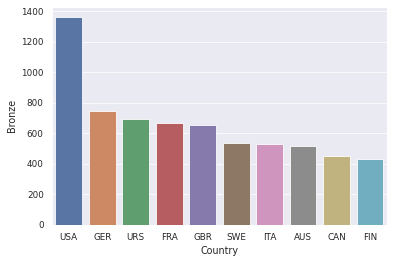

In [77]:
medal_count_df.sort_values('Bronze', axis = 0, ascending = False, inplace = True)

sns.barplot(x = 'Country', y = 'Bronze', data = medal_count_df.head(10));

In [81]:
#Qual país ganhou mais medalhas no total?

max_gold_index = medal_count_df["Total"].idxmax()
print("Country with Max Total - ", medal_count_df.loc[max_gold_index]["Country"])
print("Number of Total Medals won - ", medal_count_df.loc[max_gold_index]["Total"])

Country with Max Total -  USA
Number of Total Medals won -  5637


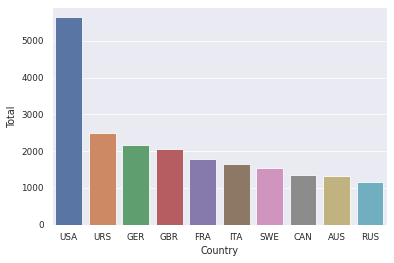

In [78]:
medal_count_df.sort_values('Total', axis = 0, ascending = False, inplace = True)

sns.barplot(x = 'Country', y = 'Total', data = medal_count_df.head(10));

In [86]:
#Quantos países nunca ganharam medalhas?

never_won_medal = medal_count_df[medal_count_df['Total'] == 0]

print('Number of countries that Never won a medal:', len(never_won_medal))
print(never_won_medal['Country'].tolist())

Number of countries that Never won a medal: 81
['GBS', 'BHU', 'COK', 'CAY', 'SMR', 'GUM', 'BUR', 'SWZ', 'TLS', 'COD', 'MAL', 'AND', 'CAM', 'MHL', 'ANT', 'PNG', 'BOL', 'UNK', 'TUV', 'NFL', 'SSD', 'ALB', 'GAM', 'CRT', 'FSM', 'MLI', 'KIR', 'CPV', 'SAA', 'ROT', 'LCA', 'MYA', 'VNM', 'RHO', 'STP', 'IVB', 'BRU', 'LAO', 'BIH', 'CAF', 'GUI', 'HON', 'PLW', 'LBR', 'TKM', 'VIN', 'SKN', 'NCA', 'SOM', 'CHA', 'MAD', 'CGO', 'MDV', 'LBA', 'ESA', 'BEN', 'SOL', 'BAN', 'YAR', 'ASA', 'SAM', 'RWA', 'DMA', 'MAW', 'NBO', 'ARU', 'NRU', 'GEQ', 'PLE', 'OMA', 'COM', 'ANG', 'VAN', 'MTN', 'YEM', 'SLE', 'YMD', 'BIZ', 'MLT', 'SEY', 'LES']


In [87]:
#Quantos países nunca ganharam medalhas de ouro?

never_won_medal = medal_count_df[medal_count_df['Gold'] == 0]

print('Number of countries that Never won a gold medal:', len(never_won_medal))
print(never_won_medal['Country'].tolist())

Number of countries that Never won a gold medal: 121
['GHA', 'ISL', 'PAR', 'MAS', 'MNE', 'BOH', 'PHI', 'MDA', 'KSA', 'QAT', 'WIF', 'LIB', 'NAM', 'KGZ', 'TAN', 'NIG', 'SRI', 'UAR', 'AFG', 'KUW', 'ZAM', 'ERI', 'MKD', 'IRQ', 'ISV', 'SEN', 'GUA', 'GUY', 'AHO', 'MRI', 'TOG', 'MON', 'TGA', 'CYP', 'BOT', 'SUD', 'GAB', 'DJI', 'BER', 'BAR', 'GBS', 'BHU', 'COK', 'CAY', 'SMR', 'GUM', 'BUR', 'SWZ', 'TLS', 'COD', 'MAL', 'AND', 'CAM', 'MHL', 'ANT', 'PNG', 'BOL', 'UNK', 'TUV', 'NFL', 'SSD', 'ALB', 'GAM', 'CRT', 'FSM', 'MLI', 'KIR', 'CPV', 'SAA', 'ROT', 'LCA', 'MYA', 'VNM', 'RHO', 'STP', 'IVB', 'BRU', 'LAO', 'BIH', 'CAF', 'GUI', 'HON', 'PLW', 'LBR', 'TKM', 'VIN', 'SKN', 'NCA', 'SOM', 'CHA', 'MAD', 'CGO', 'MDV', 'LBA', 'ESA', 'BEN', 'SOL', 'BAN', 'YAR', 'ASA', 'SAM', 'RWA', 'DMA', 'MAW', 'NBO', 'ARU', 'NRU', 'GEQ', 'PLE', 'OMA', 'COM', 'ANG', 'VAN', 'MTN', 'YEM', 'SLE', 'YMD', 'BIZ', 'MLT', 'SEY', 'LES']


In [88]:
#Quantos países nunca ganharam medalhas de ouro?

never_won_medal = medal_count_df[medal_count_df['Silver'] == 0]

print('Number of countries that Never won a silver medal:', len(never_won_medal))
print(never_won_medal['Country'].tolist())

Number of countries that Never won a silver medal: 102
['FIJ', 'WIF', 'PAN', 'AFG', 'KUW', 'SUR', 'UAE', 'MOZ', 'ERI', 'MKD', 'IRQ', 'KOS', 'JOR', 'NEP', 'GUY', 'MRI', 'TOG', 'MON', 'DJI', 'BER', 'BAR', 'GBS', 'BHU', 'COK', 'CAY', 'SMR', 'GUM', 'BUR', 'SWZ', 'TLS', 'COD', 'MAL', 'AND', 'CAM', 'MHL', 'ANT', 'PNG', 'BOL', 'UNK', 'TUV', 'NFL', 'SSD', 'ALB', 'GAM', 'CRT', 'FSM', 'MLI', 'KIR', 'CPV', 'SAA', 'ROT', 'LCA', 'MYA', 'VNM', 'RHO', 'STP', 'IVB', 'BRU', 'LAO', 'BIH', 'CAF', 'GUI', 'HON', 'PLW', 'LBR', 'TKM', 'VIN', 'SKN', 'NCA', 'SOM', 'CHA', 'MAD', 'CGO', 'MDV', 'LBA', 'ESA', 'BEN', 'SOL', 'BAN', 'YAR', 'ASA', 'SAM', 'RWA', 'DMA', 'MAW', 'NBO', 'ARU', 'NRU', 'GEQ', 'PLE', 'OMA', 'COM', 'ANG', 'VAN', 'MTN', 'YEM', 'SLE', 'YMD', 'BIZ', 'MLT', 'SEY', 'LES']


In [89]:
#Quantos países nunca ganharam medalhas de bronze?

never_won_medal = medal_count_df[medal_count_df['Bronze'] == 0]

print('Number of countries that Never won a silver medal:', len(never_won_medal))
print(never_won_medal['Country'].tolist())

Number of countries that Never won a silver medal: 105
['PAR', 'PER', 'MNE', 'FIJ', 'LUX', 'NAM', 'VIE', 'TAN', 'ECU', 'GRN', 'BDI', 'SRI', 'KOS', 'JOR', 'NEP', 'ISV', 'SEN', 'GUA', 'AHO', 'TGA', 'CYP', 'BOT', 'SUD', 'GAB', 'GBS', 'BHU', 'COK', 'CAY', 'SMR', 'GUM', 'BUR', 'SWZ', 'TLS', 'COD', 'MAL', 'AND', 'CAM', 'MHL', 'ANT', 'PNG', 'BOL', 'UNK', 'TUV', 'NFL', 'SSD', 'ALB', 'GAM', 'CRT', 'FSM', 'MLI', 'KIR', 'CPV', 'SAA', 'ROT', 'LCA', 'MYA', 'VNM', 'RHO', 'STP', 'IVB', 'BRU', 'LAO', 'BIH', 'CAF', 'GUI', 'HON', 'PLW', 'LBR', 'TKM', 'VIN', 'SKN', 'NCA', 'SOM', 'CHA', 'MAD', 'CGO', 'MDV', 'LBA', 'ESA', 'BEN', 'SOL', 'BAN', 'YAR', 'ASA', 'SAM', 'RWA', 'DMA', 'MAW', 'NBO', 'ARU', 'NRU', 'GEQ', 'PLE', 'OMA', 'COM', 'ANG', 'VAN', 'MTN', 'YEM', 'SLE', 'YMD', 'BIZ', 'MLT', 'SEY', 'LES']


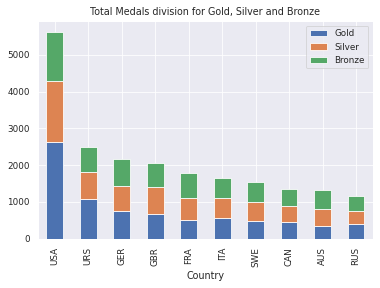

In [90]:
#Visualização das medalhas:

medal_count_df.sort_values("Total", axis = 0, ascending = False, inplace = True)
temp_medal_df = medal_count_df.drop(["Total"], axis = 1)
temp_medal_df.head(10).plot(x = 'Country', kind='bar', stacked=True, title='Total Medals division for Gold, Silver and Bronze');